# CIFAR-100 Dataset

**1.Dataset Setup**

> Import necessary libraries: This includes tensorflow, keras, numpy, and matplotlib.pyplot. You will also import specific layers and utilities like to_categorical and CIFAR-100 itself.

**1.1 Load the CIFAR-100 dataset:** The dataset contains 60,000 images (50,000 for training, 10,000 for testing), each 32x32 pixels with three color channels (RGB).

**1.2 Preprocess the data:**

 > Normalize Images: Scale the pixel values from the range of 0-255 to 0-1. This is a crucial step for helping the model converge faster.

> One-Hot Encode Labels: Convert the integer labels (0-99) into a one-hot encoded vector of size 100. This is required for multi-class classification using the categorical_crossentropy loss function.

> Verify data shapes: Confirm that your training and testing sets have the correct dimensions (e.g., (50000, 32, 32, 3) for the training images and (50000, 100) for the training labels).

**2. Model Building**

> Define the architecture for each model to be compared. Unlike the simpler Fashion-MNIST dataset, a single-layer CNN may not perform well on CIFAR-100 due to its complexity.

> Basic CNN Model: A simple sequential model with a few Conv2D and MaxPooling2D layers, followed by a Dense classifier. This will serve as a baseline.

> Deeper CNN Model: An enhanced version of the basic model with more convolutional blocks and more filters per layer. This will test if increased complexity improves accuracy.

> Advanced Architecture (Optional): For an advanced PoW, you could explore a pre-trained model using transfer learning, such as a simplified version of ResNet or VGG, as these are known to perform well on such datasets.

**3. Model Training**
Train each model: Fit each model to the prepared training data.

> Implement Callbacks: Use EarlyStopping to stop training when the validation loss stops decreasing, preventing overfitting. Use ModelCheckpoint to save the weights of the best-performing model based on validation accuracy, ensuring you don't lose your progress.

**4. Model Evaluation**
> Load best weights: Load the saved weights from the ModelCheckpoint for each model to ensure you are evaluating the best-performing versions.

> Evaluate on the test set: Use model.evaluate() to calculate the final loss and accuracy on the unseen test data.

> Visualize training history: Plot the training and validation accuracy and loss curves for each model to visually compare their learning behavior and identify overfitting.

> Generate confusion matrix: Create a confusion matrix to analyze which classes the best model is struggling with. For example, a dog may be misclassified as a wolf or a cat, showing the challenges of fine-grained classification.

**5. Prediction Analysis**
> Make predictions: Use the best-performing model to predict classes for a batch of test images.

> Visualize predictions: Display some of the test images along with their predicted and true labels. This provides a clear, tangible demonstration of your model's capabilities and its limitations.




**Goal: To analyze and demonstrate how increasing model complexity and using advanced techniques can significantly improve classification accuracy on a challenging dataset like CIFAR-100, a key skill for any aspiring AI or machine learning engineer.**

### Step 0 : Importing Necessaries Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Dataset Setup

- Importing dataset from keras , and necessary libraries for furthur work.
- In first step we imported the dataset , then we pre process the dataset so that the pixel value comes in range from 0 to 1 , then using to_categorical we converted the y_train,y_test to numerical value , then in lastly we see the shape of the training  and testing dataset

In [ ]:

print("1. Dataset Setup...")

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Verify the shapes
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test_one_hot.shape}")
print("-" * 50)

1. Dataset Setup...
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)
--------------------------------------------------


# 2 . Model Building

- In this step we build the model , there are so many jargons I used , like sequential , dropout , padding , activation  ,Conv2d, maxpooling , flatten , loss='categorical_crossentropy'

- sequential : This is a linear stack of layers. It's the simplest way to build a model in Keras, where we add layers one after another.

- Conv2D() (Convolutional Layer): This layer performs a convolution operation, which applies a small filter (or kernel) over the input image to extract features like edges, textures, or patterns.
   - 32, 64, 128: These numbers represent the number of filters (or feature maps). Each filter learns a specific feature. The number of filters increases in each block to learn more complex features from the downsampled input.
   - (3, 3): This is the kernel size (or filter size). It defines the dimensions of the sliding window that moves over the input data.

- padding='same': This parameter ensures that the output feature map has the same spatial dimensions (height and width) as the input, by padding the input with zeros around its borders.

- activation : we use activation = 'relu','leaky relu' , etc , in order to introduce non linearity into model  , to make our model our robust that allows it to learn more complex patterns / realtionships  . It outputs the input directly if it's positive, otherwise, it outputs zero.

- MaxPooling2D() (Max Pooling Layer): This layer downsamples the input feature maps, reducing their spatial dimensions (height and width) and the number of parameters. This helps in controlling overfitting and making the model more robust to minor shifts and distortions in the input.
   - pool_size=(2, 2): This is the size of the window that slides over the input. For a pool_size of (2, 2), the layer takes the maximum value from a 2x2 area, reducing the size of the feature map by half.

- Dropout(): This is a regularization technique used to prevent overfitting. During training, it randomly sets a fraction of the input units to zero.

This forces the network to learn more robust features by not relying on any single neuron.
    - 0.25, 0.5: These values represent the dropout rate, or the fraction of neurons to drop. A rate of 0.25 means 25% of the neurons will be randomly dropped.

- Flatten(): This layer flattens the multi-dimensional output from the convolutional layers into a single, one-dimensional vector. This is a necessary step before feeding the data into the fully connected (Dense) layers.


- optimizer='adam': Adam (Adaptive Moment Estimation) is an optimization algorithm used to update the model's weights during training to minimize the loss. It's an efficient and popular choice.



- loss='categorical_crossentropy': This is the loss function used for multi-class classification. It measures the difference between the predicted probability distribution and the true one-hot encoded class labels. The goal of training is to minimize this value.



- metrics=['accuracy']: This specifies the metric used to evaluate the model's performance. Accuracy is the proportion of correctly classified samples.


In [ ]:
print("2. Model Building...")

# Define the Deeper CNN Model architecture
def build_deeper_cnn_model():
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

deeper_cnn_model = build_deeper_cnn_model()
deeper_cnn_model.summary()
print("-" * 50)


2. Model Building...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,964 (2.29 MB)

 Trainable params: 600,964 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------


# 3. Model Training


*   **Callbacks:** These are functions that are called at specific stages of the training process, such as at the end of each epoch.

* They provide a way to inspect the state of the model and its metrics, and can be used to take action based on those metrics, like stopping training or saving the model.


*   EarlyStopping: A type of callback that halts the training process when a monitored metric has stopped improving. This is a regularization technique that prevents overfitting and saves computational time.


* monitor='val_loss': This specifies the metric to monitor for improvement. Here, it's the validation loss, which measures how well the model is performing on data it hasn't seen before

* patience=15: The number of epochs to wait after the last time the monitored metric improved. If the validation loss doesn't decrease for 15 consecutive epochs, training will stop.

* monitor='val_accuracy': The metric to monitor for improvement. The model is saved only when the validation accuracy is higher than the best value seen so fa


* batch_size=64: The number of training samples to work through before updating the model's internal parameters. Using a larger batch size can make training faster but may require more memory

* epochs=100: The number of times the training algorithm will work through the entire training dataset.

In [ ]:
# 3. Model Training
print("3. Model Training...")

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cifar100_deeper_cnn_best_model.keras',
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)

# Train the model
history = deeper_cnn_model.fit(x_train, y_train_one_hot,
                               batch_size=64,
                               epochs=100,
                               validation_data=(x_test, y_test_one_hot),
                               callbacks=[early_stopping, model_checkpoint])
print("-" * 50)

3. Model Training...
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0217 - loss: 4.4426
Epoch 1: val_accuracy improved from -inf to 0.07110, saving model to cifar100_deeper_cnn_best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.0217 - loss: 4.4424 - val_accuracy: 0.0711 - val_loss: 4.0340
Epoch 2/100
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0860 - loss: 3.9331
Epoch 2: val_accuracy improved from 0.07110 to 0.16770, saving model to cifar100_deeper_cnn_best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0860 - loss: 3.9326 - val_accuracy: 0.1677 - val_loss: 3.5300
Epoch 3/100
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1454 - loss: 3.5779
Epoch 3: val_accuracy improved from 0.16770 to 0.21390, saving model to cifar100_deeper_cnn_best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1454 - loss: 3.5775 - val_accuracy: 0.2139 - val_loss: 3.2795
Epoch 4/100
777/782 ━━━━━━━━━━━━━━━━━━━

# 4. Model Evaluation


4. Model Evaluation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4703 - loss: 2.0515
Final Test Loss: 2.0583
Final Test Accuracy: 46.47%


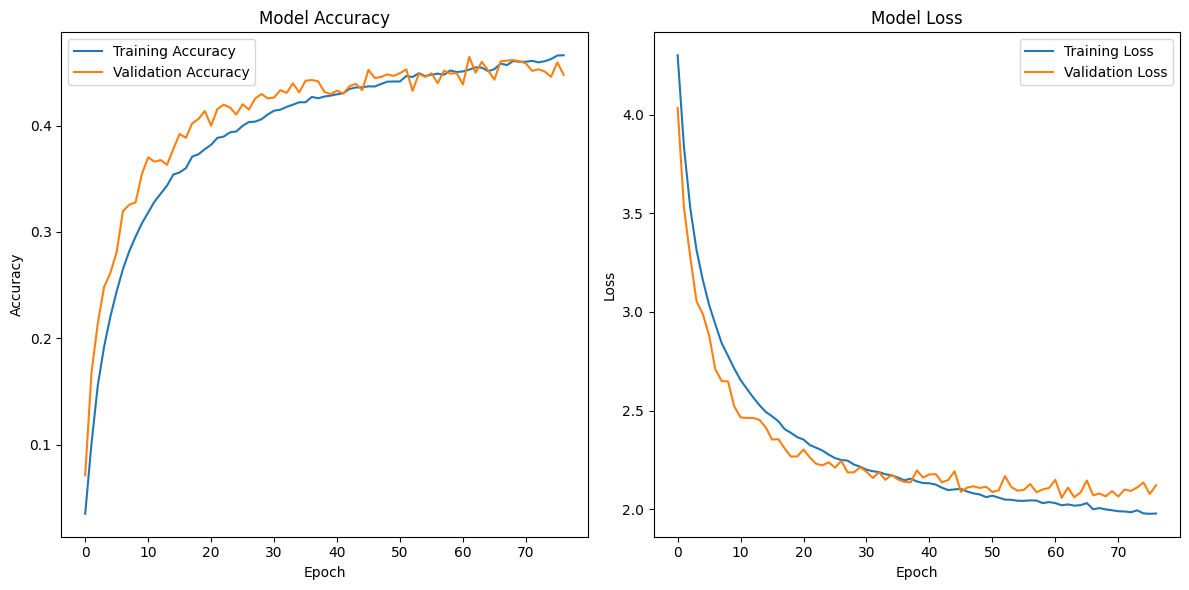


Generating confusion matrix...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


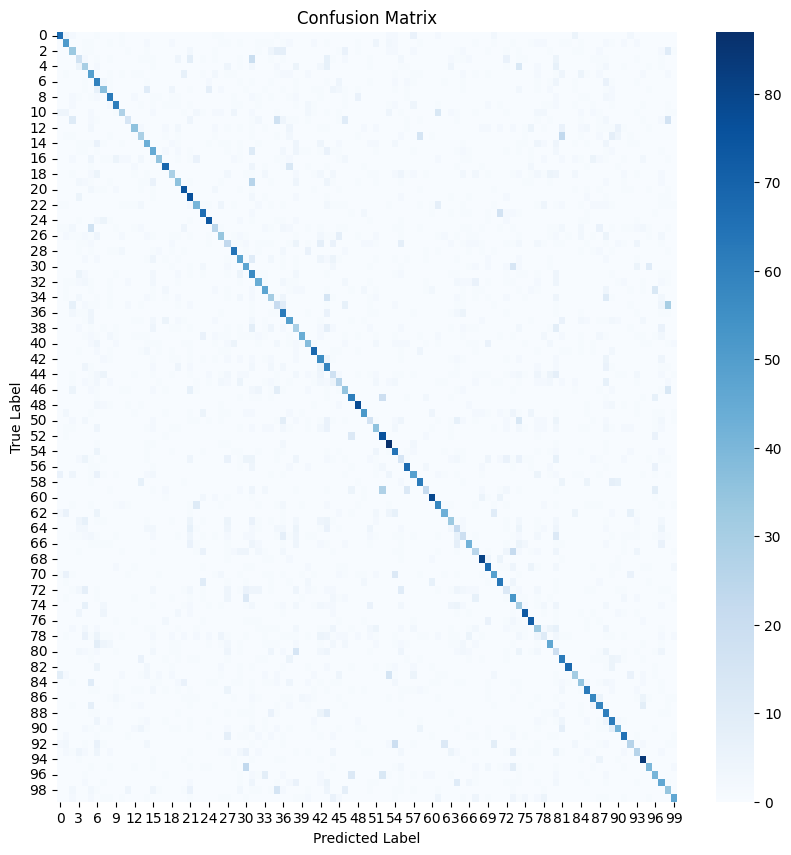

--------------------------------------------------


In [ ]:
print("4. Model Evaluation...")

# Load the best model weights
deeper_cnn_model = keras.models.load_model('cifar100_deeper_cnn_best_model.keras')

# Evaluate on the test set
loss, accuracy = deeper_cnn_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Final Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Generate and visualize confusion matrix
print("\nGenerating confusion matrix...")
y_pred_probs = deeper_cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
print("-" * 50)

### Interpretation :
- Here , we can see that Training Accuracy(blue_lien) is consistently increasing , that indicates the model is effectively learning from the training data .

- validation accuracy(orange line) : steady increase  throughout the training process , as it is increasing , it generalize to well new unseen data , not just memorizing the training examples

- In right plot , we can see as the no.of epochs increased the loss in validation and training reduces that means it means that our model has learned the things properly , (the difference between expected and actual reduces) , we know loss is the average of errors of all the data points

5. Prediction Analysis...


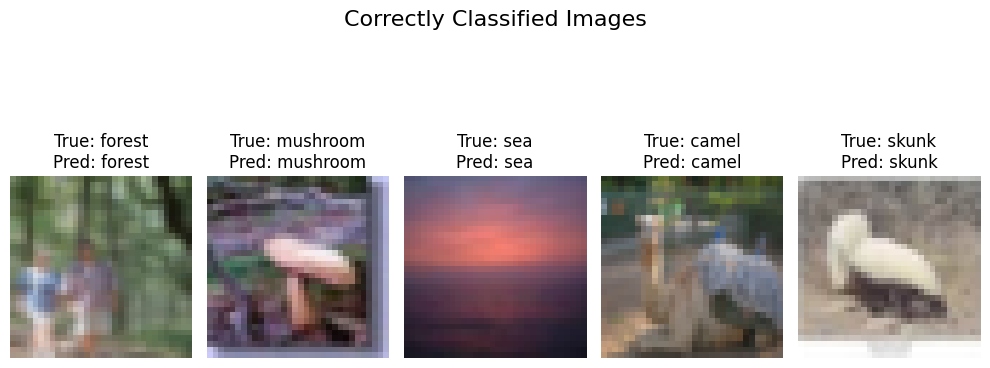

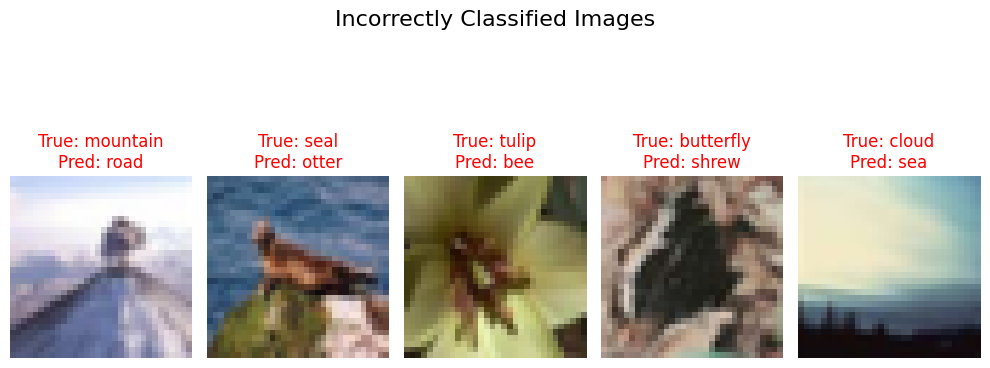

The best model has been saved, and key performance metrics are visualized.


In [ ]:
# 5. Prediction Analysis
print("5. Prediction Analysis...")

# Create a list of CIFAR-100 class names
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Find and visualize a few correctly and incorrectly classified images
correct_indices = np.where(y_pred == y_test.flatten())[0]
incorrect_indices = np.where(y_pred != y_test.flatten())[0]

# Plot correctly classified images
plt.figure(figsize=(10, 5))
plt.suptitle('Correctly Classified Images', fontsize=16)
for i, correct in enumerate(correct_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[correct])
    plt.title(f"True: {class_names[y_test[correct][0]]}\nPred: {class_names[y_pred[correct]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot incorrectly classified images
plt.figure(figsize=(10, 5))
plt.suptitle('Incorrectly Classified Images', fontsize=16)
for i, incorrect in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[incorrect])
    plt.title(f"True: {class_names[y_test[incorrect][0]]}\nPred: {class_names[y_pred[incorrect]]}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()

print("The best model has been saved, and key performance metrics are visualized.")


# Prediction with random image :
#### - On Deeper CNN model


6. Classifying a New Image...
Original image size: (262, 148)
Resized image size: (32, 32)
Image array shape for model input: (1, 32, 32, 3)


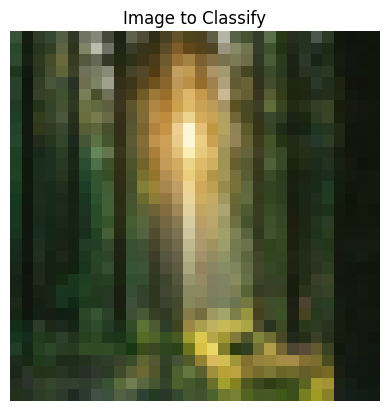

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The image is classified as: forest
Confidence: 74.11%

Top 5 predictions:
- forest: 74.11%
- mushroom: 7.96%
- aquarium_fish: 4.42%
- willow_tree: 3.04%
- tulip: 2.89%


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# A placeholder function to load and preprocess a new image
def classify_new_image(image_path, model, class_names):
    """
    Loads, preprocesses, and classifies a single image.

    Args:
        image_path (str): The file path to the image.
        model (keras.Model): The trained classification model.
        class_names (list): A list of class names in order.
    """
    try:
        # Load the image using Pillow (PIL)
        image = Image.open(image_path)
        print(f"Original image size: {image.size}")

        # Rescale and Resize the image to 32x32 pixels
        image = image.resize((32, 32))
        print(f"Resized image size: {image.size}")

        # Convert the image to a NumPy array
        img_array = np.array(image)

        # Normalize the pixel values (rescale to 0-1)
        img_array = img_array.astype('float32') / 255.0

        # Add a batch dimension to the array. The model expects a batch of images.
        img_array = np.expand_dims(img_array, axis=0)
        print(f"Image array shape for model input: {img_array.shape}")

        # Display the image you're about to classify
        plt.imshow(image)
        plt.title('Image to Classify')
        plt.axis('off')
        plt.show()

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        confidence = np.max(prediction)

        # Print the prediction results
        predicted_class_name = class_names[predicted_class_index]
        print(f"The image is classified as: {predicted_class_name}")
        print(f"Confidence: {confidence*100:.2f}%")

        # Display top N predictions and their probabilities
        top_n = 5
        top_n_indices = np.argsort(prediction[0])[-top_n:][::-1]
        print(f"\nTop {top_n} predictions:")
        for i in top_n_indices:
            print(f"- {class_names[i]}: {prediction[0][i]*100:.2f}%")


    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Example Usage ---
# Replace 'path/to/your/image.jpg' with the actual path to your image file.
# Make sure the image is of a type that your model can recognize.
# For example, download an image of a 'bus' from the internet.
print("\n6. Classifying a New Image...")

# Example with a placeholder path. You MUST change this.
image_to_classify_path = '/content/img_forest.jfif' # Corrected file path

# The model and class_names are already defined from the previous code
classify_new_image(image_to_classify_path, deeper_cnn_model, class_names)

In [1]:
# Let's move towards more deeper model and dense model
# where we incorporate more layers of convulational , maxpooling , along with dropout(to deal with overfitting) ,
# before FFN (FeedForward Neural Network )


# Deep and Dense CNN for CIFAR-100 classifcation:
#### Another model

1. Dataset Setup...
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
--------------------------------------------------
2. Model Building (Deep and Dense CNN)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,780,836 (10.61 MB)

 Trainable params: 2,775,972 (10.59 MB)

 Non-trainable params: 4,864 (19.00 KB)

--------------------------------------------------
3. Model Training...
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0507 - loss: 4.8633
Epoch 1: val_accuracy improved from -inf to 0.14620, saving model to cifar100_deep_dense_cnn_best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.0507 - loss: 4.8627 - val_accuracy: 0.1462 - val_loss: 3.6599
Epoch 2/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1491 - loss: 3.6411
Epoch 2: val_accuracy improved from 0.14620 to 0.21900, saving model to cifar100_deep_dense_cnn_best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.1492 - loss: 3.6407 - val_accuracy: 0.2190 - val_loss: 3.1445
Epoch 3/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2322 - loss: 3.0812
Epoch 3: val_accuracy improved from 0.21900 to 0.31930, saving model to cifar100_deep_dense_cnn_best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.2322 - loss: 3.0810 - val_accurac

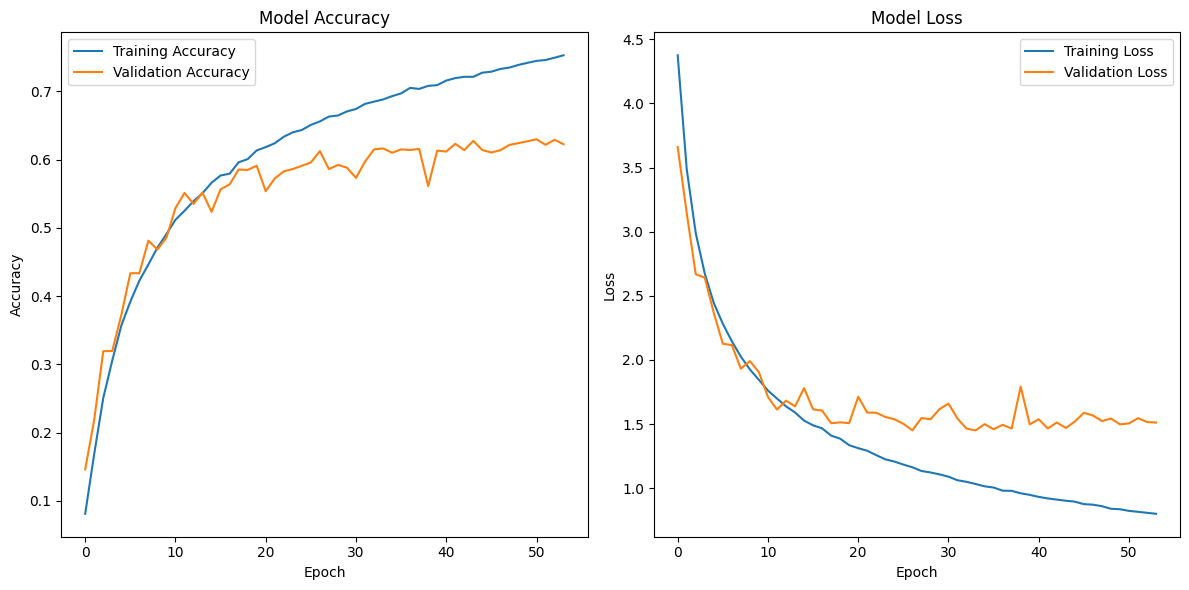


Generating confusion matrix...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


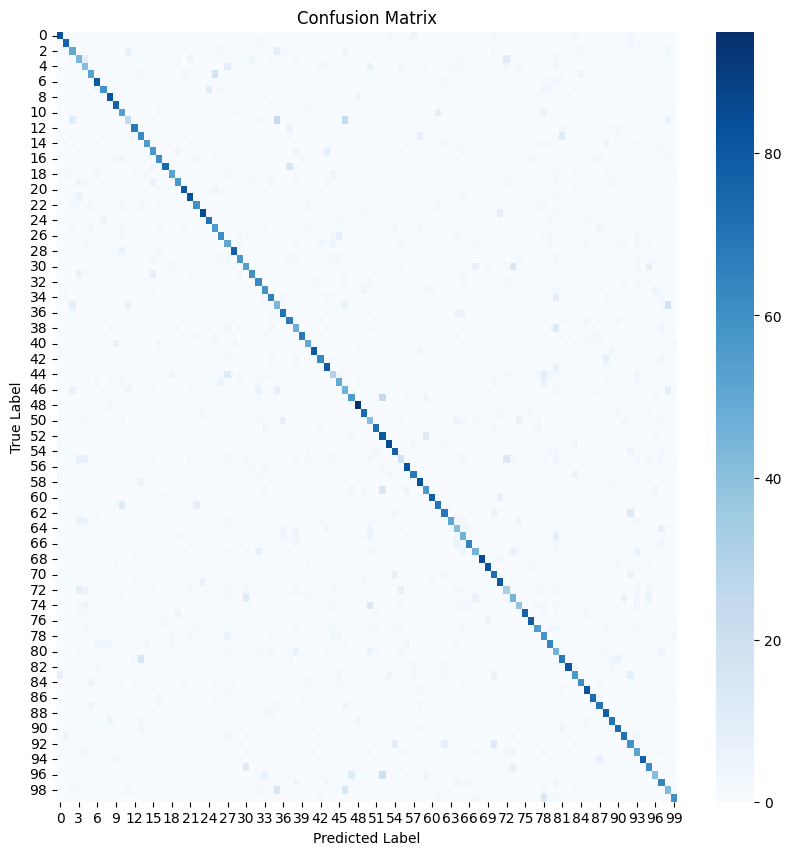

--------------------------------------------------
5. Prediction Analysis...


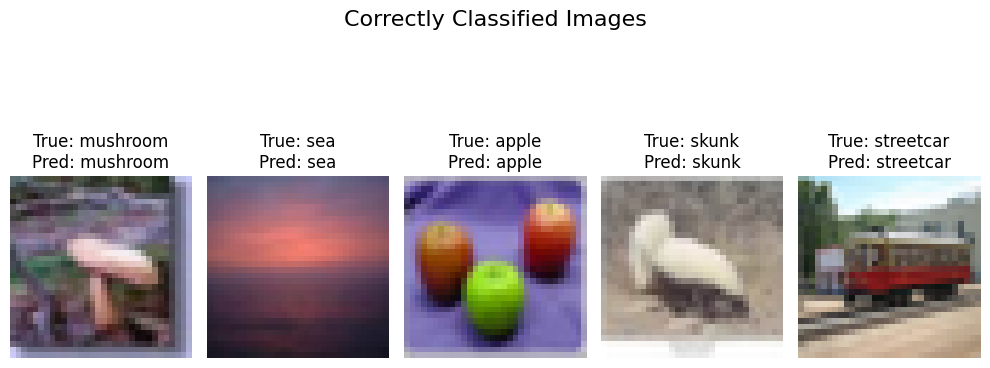

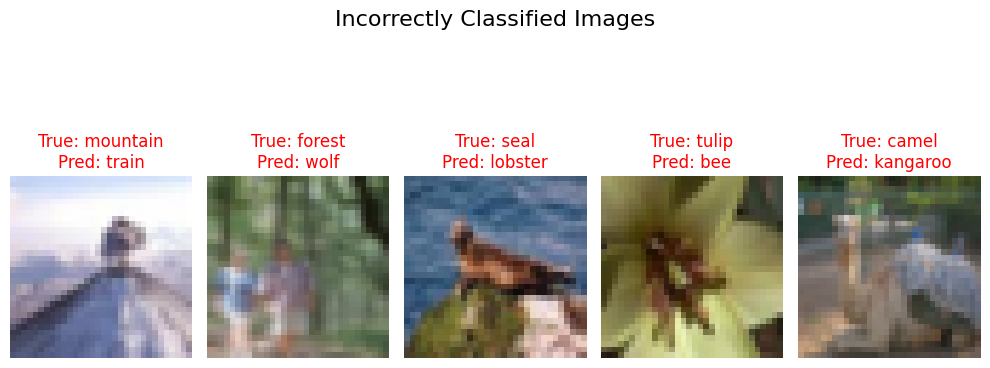


6. Classifying a New Image...


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 1. Dataset Setup
print("1. Dataset Setup...")

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print("-" * 50)

# 2. Model Building (Deep and Dense CNN)
print("2. Model Building (Deep and Dense CNN)...")

def build_deep_dense_cnn():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

deep_dense_cnn = build_deep_dense_cnn()
deep_dense_cnn.summary()
print("-" * 50)

# 3. Model Training
print("3. Model Training...")

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cifar100_deep_dense_cnn_best_model.keras',
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)

history = deep_dense_cnn.fit(x_train, y_train_one_hot,
                             batch_size=64,
                             epochs=100,
                             validation_data=(x_test, y_test_one_hot),
                             callbacks=[early_stopping, model_checkpoint])
print("-" * 50)

# 4. Model Evaluation
print("4. Model Evaluation...")

best_model = keras.models.load_model('cifar100_deep_dense_cnn_best_model.keras')

loss, accuracy = best_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Final Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Generate and visualize confusion matrix
print("\nGenerating confusion matrix...")
y_pred_probs = best_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
print("-" * 50)

# 5. Prediction Analysis
print("5. Prediction Analysis...")

class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy',
    'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest',
    'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
    'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
    'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]

# Plot correctly classified images
correct_indices = np.where(y_pred == y_test.flatten())[0]
plt.figure(figsize=(10, 5))
plt.suptitle('Correctly Classified Images', fontsize=16)
for i, correct in enumerate(correct_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[correct])
    plt.title(f"True: {class_names[y_test[correct][0]]}\nPred: {class_names[y_pred[correct]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot incorrectly classified images
incorrect_indices = np.where(y_pred != y_test.flatten())[0]
plt.figure(figsize=(10, 5))
plt.suptitle('Incorrectly Classified Images', fontsize=16)
for i, incorrect in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[incorrect])
    plt.title(f"True: {class_names[y_test[incorrect][0]]}\nPred: {class_names[y_pred[incorrect]]}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\n6. Classifying a New Image...")



Original image size: (960, 640)
Resized image size: (32, 32)
Image array shape for model input: (1, 32, 32, 3)


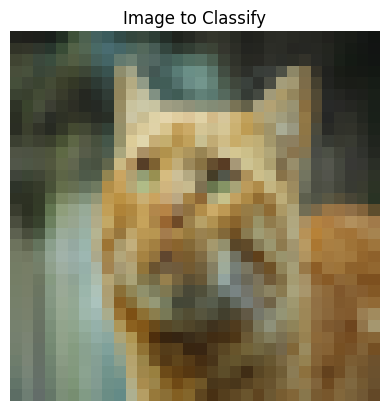

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image is classified as: tiger
Confidence: 93.80%

Top 5 predictions:
- tiger: 93.80%
- bee: 5.13%
- lion: 0.57%
- fox: 0.20%
- leopard: 0.11%

Project complete! You have successfully built, trained, and evaluated a deep CNN on the CIFAR-100 dataset.
The best model has been saved, and key performance metrics are visualized. You can now use it to classify new images.


In [5]:
def classify_new_image(image_path, model, class_names):
    """
    Loads, preprocesses, and classifies a single image.

    Args:
        image_path (str): The file path to the image.
        model (keras.Model): The trained classification model.
        class_names (list): A list of class names in order.
    """
    try:
        # Load the image using Pillow (PIL)
        image = Image.open(image_path)
        print(f"Original image size: {image.size}")

        # Rescale and Resize the image to 32x32 pixels
        image = image.resize((32, 32))
        print(f"Resized image size: {image.size}")

        # Convert the image to a NumPy array
        img_array = np.array(image)

        # Normalize the pixel values (rescale to 0-1)
        img_array = img_array.astype('float32') / 255.0

        # Add a batch dimension to the array. The model expects a batch of images.
        img_array = np.expand_dims(img_array, axis=0)
        print(f"Image array shape for model input: {img_array.shape}")

        # Display the image you're about to classify
        plt.imshow(image)
        plt.title('Image to Classify')
        plt.axis('off')
        plt.show()

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        confidence = np.max(prediction)

        # Print the prediction results
        predicted_class_name = class_names[predicted_class_index]
        print(f"The image is classified as: {predicted_class_name}")
        print(f"Confidence: {confidence*100:.2f}%")

        # Display top N predictions and their probabilities
        top_n = 5
        top_n_indices = np.argsort(prediction[0])[-top_n:][::-1]
        print(f"\nTop {top_n} predictions:")
        for i in top_n_indices:
            print(f"- {class_names[i]}: {prediction[0][i]*100:.2f}%")


    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

image_to_classify_path = '/content/img_cat.jpg'
classify_new_image(image_to_classify_path, best_model, class_names)



# Conclusion

- Basic CNN Model
This model is a relatively simple convolutional network. It contains a single block of two convolutional layers with 32 filters each, followed by a pooling layer and a dropout layer. This structure is effective for learning basic features like edges and textures but has limited capacity to capture the complex, hierarchical features needed for a dataset with many classes, such as CIFAR-100.

- Deeper CNN Model
This model is a more complex and powerful architecture. It uses three distinct convolutional blocks where the number of filters increases with each successive block (32, 64, and 128). This design allows the model to learn a hierarchy of features:

   The initial layers learn simple features (like edges and curves).

   The subsequent, deeper layers learn more complex and abstract features by combining the outputs of the earlier layers.


> The Deeper CNN Model is expected to perform significantly better than the basic one for the CIFAR-100 classification task. The primary reason is its increased complexity and depth.

A deeper architecture with more layers and a larger number of filters gives the model a greater capacity to learn intricate patterns and distinguish between the 100 different classes in the dataset.

> While the basic model is a good starting point, its limited number of layers and constant filter size would likely result in underfitting on a challenging dataset, meaning it won't be able to fully learn the underlying patterns. The deeper model is better equipped to handle this complexity, leading to higher accuracy and better generalization on unseen data.